In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date']) 
df['job_skills'] = df['job_skills'].apply(lambda skills : ast.literal_eval(skills) if pd.notna(skills) else skills)
df.head(3) 

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."


In [62]:
data_jobs = df.value_counts(subset='job_title_short').sort_values(ascending=False).head(3).index.to_list()
# data_jobs = ['Data Engineer', 'Data Scientist', 'Data Analyst']
df_IN = df[(df['job_title_short'].isin(data_jobs)) & (df['job_country'] =='India')].copy()
df_IN = df_IN.dropna(subset='salary_year_avg') 
df_IN['job_title_short'].unique()



array(['Data Engineer', 'Data Scientist', 'Data Analyst'], dtype=object)

In [63]:
job_list = [df_IN[(df_IN['job_title_short'] == data_job)]['salary_year_avg'] for data_job in data_jobs]
# job_list[1].notna().unique()
job_list[1]

2022      156500.0
2785      147500.0
7946      147500.0
28368     147500.0
31356     131580.0
            ...   
773374    147500.0
774539    147500.0
777184    165000.0
781832    147500.0
785395     64800.0
Name: salary_year_avg, Length: 169, dtype: float64

C:\Users\Ankit\AppData\Local\Temp\ipykernel_15152\4100166011.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list,labels=data_jobs,vert=False)


Text(0.5, 0, 'Yearly Salaries')

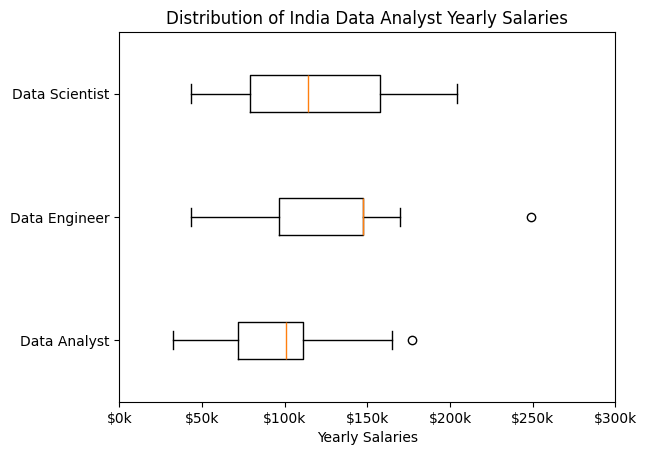

In [64]:
plt.boxplot(job_list,labels=data_jobs,vert=False)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x , pos : f'${int(x/1000)}k'))
plt.xlim(0,300_000)
plt.title('Distribution of India Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salaries')
